# Exit Survey Analysis

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We will need to clean and combine the data before we start asking the data some questions.

# Objective

In this project, we aim to answer a couple of questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Reading the datasets

We will read the 'Not Stated' values as null.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\dete_survey.csv', encoding='UTF-8', na_values='Not Stated')
tafe_survey = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\tafe_survey.csv', encoding='UTF-8')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exploring the datasets

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

# Dropping unneccessary columns

There are many unneccessary columns in both our datasets that won't be helping us in any way in our analysis. Let's drop those columns

In [5]:
columns_to_drop = dete_survey.columns[28:49]
columns_to_drop_2 = tafe_survey.columns[17:66]
dete_survey_updated = dete_survey.drop(columns_to_drop, axis=1)
tafe_survey_updated = tafe_survey.drop(columns_to_drop_2, axis=1)

In [6]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

# Standardizing the columns in both the datasets

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace('\s+', '_')

In [8]:
type(dete_survey_updated)

pandas.core.frame.DataFrame

In [9]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

# Analyzing the 'separationtype' column

In [10]:
print(dete_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [11]:
print(tafe_survey_updated['separationtype'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [12]:
resignation_types = ['Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate']
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(resignation_types)]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

We are only extracting rows with separation type as 'Resignation' to answer the first question from our objective
'Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?'
Hence we are only interested in employees who left the company on their own will.

In [13]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We have brought down the entries from 822 to 311 in dete dataset.

# Reset index

In [14]:
dete_resignations = dete_resignations.reset_index()

In [15]:
tafe_resignations = tafe_resignations.reset_index()

# Cleaning the date column

In [16]:
dete_resignations['cease_date'].value_counts()

2012      126
2013       74
Jan-14     22
Dec-13     17
Jun-13     14
Sep-13     11
Jul-13      9
Nov-13      9
Oct-13      6
Aug-13      4
May-12      2
May-13      2
Jul-12      1
2010        1
Sep-10      1
Jul-06      1
Name: cease_date, dtype: int64

Let's convert every date in year format

In [17]:
dete_resignations['cease_date'].loc[dete_resignations['cease_date'].str.len() > 4] = dete_resignations['cease_date'].loc[dete_resignations['cease_date'].str.len() > 4].str[-2:]

In [18]:
dete_resignations['cease_date'].value_counts()

2012    126
2013     74
13       72
14       22
12        3
2010      1
10        1
06        1
Name: cease_date, dtype: int64

All dates seems to be from 21st century hence lets add '20' in from of them

In [19]:
dete_resignations['cease_date'].loc[dete_resignations['cease_date'].str.len() == 2] = '20' + dete_resignations['cease_date'].loc[dete_resignations['cease_date'].str.len() == 2]

In [20]:
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

# Coverting to float

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float64')

# Analyzing the dete_start_date column

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

looks like no problem with that

# Analyzing the cease_date in tafe dataset

In [23]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

looks like no problem with that either

In [24]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
01-Feb                64
03-Apr                63
05-Jun                33
Nov-20                26
07-Oct                21
More than 20 years    10
Name: institute_service, dtype: int64

In [25]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [26]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

The 'institute_service' column in tafe resignations has the number of years an employee was part of the institution. After some digging, it was found how the numbers were formatted. For example - 03-Feb, means 3 years and 2 months(Feb for 2), Nov-20 means the employee spent 11 months in the year 2020. We would need to fix this formatting. W ewould only be including the number of years the employee was part of the institute. 

In [27]:
def extract_num_char(x):
    if x[:2].isdigit():
        return x[:2]
    else:
        return x
    
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].fillna('NA').apply(extract_num_char)

In [28]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
01                    64
03                    63
NA                    50
05                    33
Nov-20                26
07                    21
More than 20 years    10
Name: institute_service, dtype: int64

In [29]:
value_map = {'Less than 1 year': 1, 'More than 20 years': 20, 'NA': pd.np.nan, 'Nov-20': 1}
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].replace(value_map)

In [30]:
tafe_resignations['institute_service'].value_counts()

1     99
01    64
03    63
05    33
07    21
20    10
Name: institute_service, dtype: int64

In [31]:
tafe_resignations['institute_service'] = pd.to_numeric(tafe_resignations['institute_service'], errors='coerce')

In [32]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)


0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

# Reason for  resignation fom DETE

We will now try to evaluate why the employees from DETE resigned from their positions based on the exit survey they filled before leaving.

In [33]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                311 non-null    int64  
 1   id                                   311 non-null    int64  
 2   separationtype                       311 non-null    object 
 3   cease_date                           300 non-null    float64
 4   dete_start_date                      283 non-null    float64
 5   role_start_date                      271 non-null    float64
 6   position                             308 non-null    object 
 7   classification                       161 non-null    object 
 8   region                               265 non-null    object 
 9   business_unit                        32 non-null     object 
 10  employment_status                    307 non-null    object 
 11  career_move_to_public_sector    

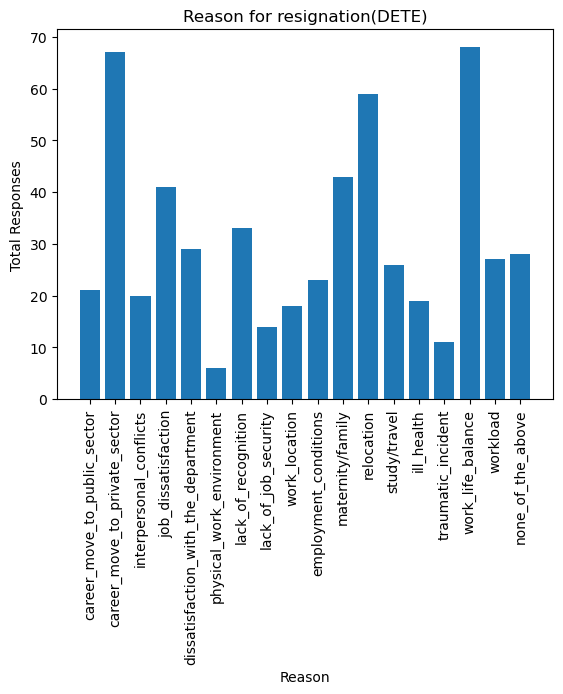

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

sums = dete_resignations.iloc[:, 11:29].sum()

plt.bar(sums.index, sums.values)
plt.title('Reason for resignation(DETE)')
plt.xlabel('Reason')
plt.ylabel('Total Responses')
plt.xticks(rotation=90)
plt.show()

We can see that most employees who handed their resignation stated 'career move to private sector' and 'work life balance' as their reason for resignation followed by 'job dissatisfaction' and 'maternity/family'.

We will now divide the employees based on their years on service in the institution and see if the results changes.

In [35]:
dete_new_resignations = dete_resignations[dete_resignations['institute_service'] <= 3]
dete_experienced_resignations = dete_resignations[dete_resignations['institute_service'] > 3]

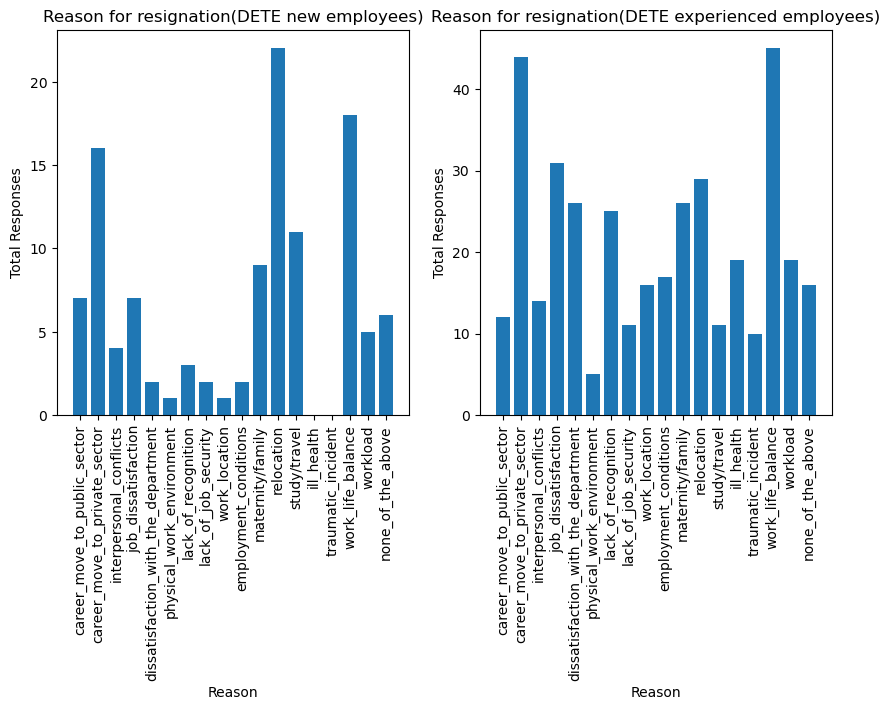

In [36]:
sums = dete_new_resignations.iloc[:, 11:29].sum()
sums_1 = dete_experienced_resignations.iloc[:, 11:29].sum()
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols=2, figsize=(10, 5))
ax1.bar(sums.index, sums.values)
ax1.set_title('Reason for resignation(DETE new employees)')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Total Responses')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(sums_1.index, sums_1.values)
ax2.set_title('Reason for resignation(DETE experienced employees)')
ax2.set_xlabel('Reason')
ax2.set_ylabel('Total Responses')
ax2.tick_params(axis='x', rotation=90)
plt.show()

We can conclude from the graph that the most cited reason for new employees for resigning is 'relocation' followed by 'work life balance' and 'career move to private sector'. It is interesting to not that 'ill health' and 'traumatic incident' were never the reason given for resignation.

For experienced employees though, the most number of employees gave 'work life balance' as their reason to stop working at the current firm followed by a 'career move to private sector'.

# Reason for resignation from TAFE

Let's analyze the reasons given by employees of TAFE for resignation and see if we can find any resemblance to DETE.

First we will need to do some cleaning on the contributing factors columns.

In [37]:
cols_to_replace = tafe_resignations.columns[6:18]
tafe_resignations[cols_to_replace] = tafe_resignations[cols_to_replace].replace('-', np.nan)

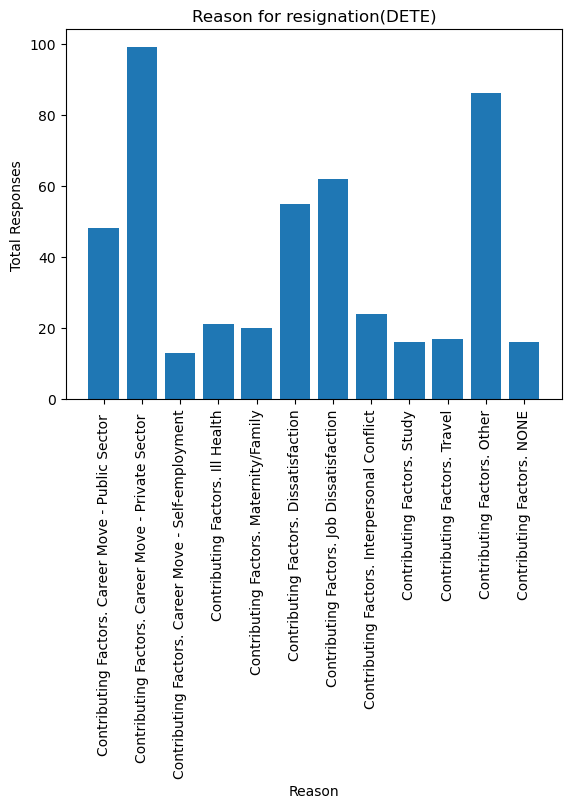

In [38]:
sums = tafe_resignations.iloc[:, 6:18].count()

plt.bar(sums.index, sums.values)
plt.title('Reason for resignation(DETE)')
plt.xlabel('Reason')
plt.ylabel('Total Responses')
plt.xticks(rotation=90)
plt.show()

In [39]:
tafe_new_resignations = tafe_resignations[tafe_resignations['institute_service'] <= 3]
tafe_experienced_resignations = tafe_resignations[tafe_resignations['institute_service'] > 3]

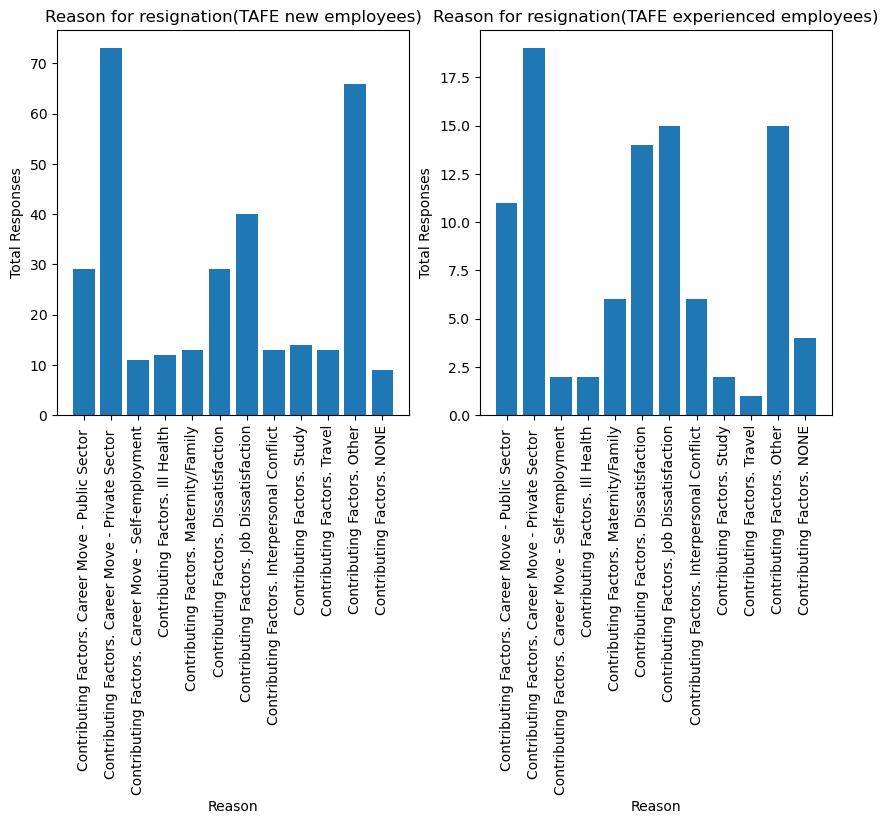

In [40]:
sums = tafe_new_resignations.iloc[:, 6:18].count()
sums_1 = tafe_experienced_resignations.iloc[:, 6:18].count()
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols=2, figsize=(10, 5))
ax1.bar(sums.index, sums.values)
ax1.set_title('Reason for resignation(TAFE new employees)')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Total Responses')
ax1.tick_params(axis='x', rotation=90)

ax2.bar(sums_1.index, sums_1.values)
ax2.set_title('Reason for resignation(TAFE experienced employees)')
ax2.set_xlabel('Reason')
ax2.set_ylabel('Total Responses')
ax2.tick_params(axis='x', rotation=90)
plt.show()

# Conclusion

It can be concluded that most people who resign from their job position do so to move to new career position in private sector.
The work life balance factor was most responsible for resignation among experienced employees.

Both DETE and TAFE exit surveys more or less conclude the same findings from a broader perspective.